<a id='top'></a>

# CSCI3022 S22



# Exam 1 Coding

## Due Friday, March 18 at 11:59 pm to Canvas and Gradescope
***

**Name**: Matthew Su

***

This exam coding segment is due on Canvas by **11:59 PM on Friday March 18*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this exam coding assignment or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the exam coding nor can you drop your exam coding grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a exam coding clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The exam coding assignmnet is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Bottom](#bot)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import itertools
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## 30 pts) Problem 1 (Theory and Computation): Working with Distributions
***

Here in CSCI3022, we're Arsenal fans.  They have a cool shade of red, we've been itching for some soccer hooliganism in our lives, and really nobody wants to root for Tottenham.

Suppose that the English soccer leagues decide to redo their not-very-prestigous Carabao Cup.  Under the new format, the top 4 teams will each play one another **twice**, for a total of 6 games played for each team or 12 games total.  The teams in 2023 are announced as: `[Arsenal, ManUtd, Liverpool, Chelsea]`.  We rejoice, because Arsenal are in and Tottenham aren't!  Losers!

We then decide to begin to tackle some data science questions.  We survey some data from prior years, and conclude that each match is *independent* of other matches.  Further, we have following probabilities, which we are confident should hold in 2023:

- Arsenal  will beat ManUtd  60% of the time.
- Arsenal will beat Chelsea 30% of the time.
- Arsenal will beat Liverpool 50% of the time.
- ManUtd will beat Liverpool 40% of the time.
- ManUtd will beat Chelsea 50% of the time.
- Chelsea will beat Liverpool 60% of the time.

There are no ties (games go to shootouts), so each game is a win for one team and a loss for the other.

At the end of the tournament, the team with the most wins in their 6 games is the winner (or has a share of the title).


**A**: Using Markdown, what is the exact probability that Aresenal beats Chelsea both times they play?

$0.3 * 0.3 = 0.09$ or the probability that Aresenal beats Chelsea both times they play.

**B**: Using a single call to `scipy.stats`, verify your answer to part **A**.

In [2]:
stats.binom.pmf(2,2,0.3)

0.08999999999999998

**C**: Using Markdown, what are the exact **expected** number of wins for Aresenal and the **variance** of that number?

*Reminder: if you're summing two independent random variables, both the means and variances also sum!*

Expected Wins = $(0.6 * 2) + (0.3 * 2) + (0.5 * 2) = 2.8$ <br><br>
Variance = $((2-2.8)^2 * 0.09) + ((2-2.8)^2 * 0.36) + ((2-2.8)^2 *0.25) = 0.448 $



**D**:  Using one or more calls to `scipy.stats`, verify your answer to part **C**.

In [192]:
# Inspired by nb11

def helper(num_rows=6, p=0.6):
    wins = 0 
    for ii in range(num_rows):
        wins += np.random.choice([0,1], p=[1-p, p])
    return wins

# Use this to calculate individual E[X] for each game

def excalc(num_rows=6, p=0.5, num_trials=int(1e3), verbose=True):
    winnings = np.array([helper(num_rows, p) for ii in range(num_trials)])
    return np.mean(winnings)

# Calculate variance

def varOver(num_rows=6, p=0.5, num_trials=int(1e3), verbose=True):
    winnings = np.array([helper(num_rows, p) for ii in range(num_trials)])
    var_winnings  = np.var(winnings)
    print("E[Winnings] = {:.3f}, Var[Winnings] = {:.3f}".format(excalc(num_rows=2, p=0.3, num_trials=10000, verbose=True) + excalc(num_rows=2, p=0.6, num_trials=10000, verbose=True) + excalc(num_rows=2, p=0.5, num_trials=10000, verbose=True), var_winnings))

varOver(num_rows=2, p=0.6, num_trials=10000, verbose=True)





E[Winnings] = 2.814, Var[Winnings] = 0.481


**E**:  Write a function `sim_tournament` that simulates all 12 games with the probabilities above.  For each team, return their number of wins from that simulation.  Afterwards (outside the function itself), run it once and print the number of wins for each team after that one tournament.

*Usage note*: You may find that storing the win probabilities given in a $4 \times 4$ matrix/array makes it easier to loop over all of the 6 possible matchups.  You could use set it up where e.g. the $(i,j)th$ entry is the probability that team $i$ beats team $j$.

In [4]:
def sim_tournament(n):

    # I could probably have done this more efficently, but I was aiming for easy of debugging and to make sure I covered all cases correctly
    TotA = 0
    TotC = 0
    TotM = 0
    TotL = 0

    # Additional Counter to Count Ars Cup Wins/Shares 
    ArsChamps = 0

    for j in range(n):
        
        ArsWins = 0
        CheWins = 0
        ManWins = 0
        LivWins = 0

        # Arsenal Games 

        for i in range(2):
            result = np.random.choice(np.array([1,0]), p=[0.3,0.7])
            if result == 1:
                ArsWins += 1
            else:
                CheWins += 1

        for i in range(2):
            result = np.random.choice(np.array([1,0]), p=[0.6,0.4])
            if result == 1:
                ArsWins += 1
            else:
                ManWins += 1

        for i in range(2):
            result = np.random.choice(np.array([1,0]), p=[0.5,0.5])
            if result == 1:
                ArsWins += 1
            else:
                LivWins += 1

        # ManU Games

        for i in range(2):
            result = np.random.choice(np.array([1,0]), p=[0.4,0.6])
            if result == 1:
                ManWins += 1
            else:
                LivWins += 1
        for i in range(2):
            result = np.random.choice(np.array([1,0]), p=[0.5,0.5])
            if result == 1:
                ManWins += 1
            else:
                CheWins += 1

        # Chelsea Games

        for i in range(2):
            result = np.random.choice(np.array([1,0]), p=[0.6,0.4])
            if result == 1:
                CheWins += 1
            else:
                LivWins += 1

        # Liverpool games are covered in every other team's instances of winning

        TotA += ArsWins
        TotC += CheWins
        TotM += ManWins
        TotL += LivWins

        score = [ArsWins, CheWins, ManWins, LivWins]
        # If the max score is equal to score[0] (or Arsenal Wins), we know that the max score out of the list of win totals for each tournament
        # would either be the largest score or the score for which teams take a share of the title (a tie win I guess, man soccer is sad)
        if max(score) == score[0]:

            ArsChamps += 1
        

    
    

    print("Arsenal = {:.3f}, ManU = {:.3f}, Liverpool = {:.3f}, Chelsea = {:.3f}".format((TotA/n), (TotM/n), (TotL/n), (TotC/n)))

    print("Arsenal Win Probability: {:.3f}".format(ArsChamps/n))


**F**:  Call your `sim_tournament` function a sufficently large number of times to verify your answers in parts **C/D** in the simulations.

In [172]:
# sim_tournament(1)
# sim_tournament(100)
sim_tournament(10000)


Arsenal = 2.809, ManU = 2.592, Liverpool = 2.977, Chelsea = 3.621
Arsenal Win Probability: 0.272


**G**:  Using your simulations from `sim_tournament`, estimate the probability that Arsenal wins outright or has a share of of the title.

As seen with the results from F, Arsenal's win probability is roughly 27%.

[Back to top](#top)

<a id='p2'></a>

## (30 pts) Problem 2 (Computation): Another Deck of Cards
***

Dale and Brennan are at their games again, but now the weather is not sports permitting.  So they're playing a variant of "Egyptian Rat Slap," where players alternate revealing the top card off of a shuffled deck and can **slap** the card if its face matches the face of the card revealed previously.

Unfortunately, they lost a bunch of cards off the deck, and have cobbled together an unusual assortment by stealing cards from their younger sibling and parents.  Their deck consists of:

- The 40 "ace through 10" cards of a regular 52 card playing deck.  You may ignore suits in this problem, so for the purposes of their game this is 4 copies each of those 10 distinct faces.
- 5 copies of the Shiny Holo "Mudkip" Pokemon card.
- 1 "Beta BGS 9 Quad 9+ Black Lotus" Magic the Gathering card
- 3 "Olaf" cards from the Frozen collectible card sets
- 2 Michael Jordan Birmingham Barons cards

Each time they play, they take turns flipping cards off the deck, with Dale revealing the first card.  The game is over as soon as two cards with the same face are revealed consecutively, and the player who revealed the second card of that matching pair wins.


**A**: Create a function `ers(deck)` that:
- Takes a list or np.array `deck` as input
- Shuffles the deck, then checks if the entire deck could be revealed with consecutive matching faces or not.
- If consecutive cards are drawn off the deck that share a face, record which player won by revealing the second card of the matching pair.

Then run your function once and print the result, which should be one of: `["No consecutive matches", "Dale",'Brennan"].`

*Usage notes*:
- Your actual output can be integers or strings, but you should be able to convert them afterwards to the strings given.
- You also may want to represent the entire deck as a list of integers, with repeats.  See `np.repeat`.
- There are a lot of ways to check if consecutive cards match.  You can either loop over each card after shuffling (`np.shuffle` or `np.random.choice` can shuffle), or you can compare a deck ordering to the same ordering where you offset indices by one, or others you can maybe think of.

In [6]:
def ers(shuffle):
    np.random.shuffle(shuffle)
    for i in range(len(shuffle) - 1):
        if (shuffle[i] == shuffle[i+1]) and (i % 2 != 0):
            #Brennan Wins 
            return 0
        elif (shuffle[i] == shuffle[i+1]) and (i % 2 == 0):
            #Dale Wins
            return 1
    
    # If no returns trigger during for loop then no matching cards were found.

    return 2
            

    
    

**B**: Call your `ers` function a sufficently large number of times to estimate the probability that Dale and Brennan make it through a shuffle of the deck with *no* consecutive cards matching.

In [7]:
Dale = 0
Brennan = 0
Nowin = 0
# 11 = Mudkip(5), 12 = BlackLotus(1), 13 = olaf(3), 14 = MJ(2)
faces = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
amount = np.array([4,4,4,4,4,4,4,4,4,4,5,1,3,2])
deck = np.repeat(faces,amount)

# print(deck)

for i in range (10000):
    result = ers(deck)
    if(result == 1):
        Dale += 1
    elif result == 0:
        Brennan += 1
    else:
        Nowin += 1

# print("Dale wins:  {:.3f}".format(Dale/10000))
# print("Brennan wins:  {:.3f}".format(Brennan/10000))
print("No wins:  {:.3f}".format(Nowin/10000))



No wins:  0.048


**C**: Using intuition alone, which should be higher: the probability that Dale wins or the probability that Brennan wins?  You should revist the exercises in nb08 if needed.  Justify your intution in a sentence or two.

I would assume that generally speaking, the probabilities between the both of them are relatively the same, since the deck is uninfluenced. Of course, we know that Brennan always gets the first chance to win, since Dale always draws first and two cards are required to win. As such, Brennan might have a small advantage as a result, but it is little more than order based and does not affect the overall fairness of the game.

**D**: Check your intuition in **C** via your simulations from part **B**.

In [8]:
Dale = 0
Brennan = 0
Nowin = 0
# 11 = Mudkip(5), 12 = BlackLotus(1), 13 = olaf(3), 14 = MJ(2)
faces = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
amount = np.array([4,4,4,4,4,4,4,4,4,4,5,1,3,2])
deck = np.repeat(faces,amount)

# print(deck)

for i in range (10000):
    result = ers(deck)
    if(result == 1):
        Dale += 1
    elif result == 0:
        Brennan += 1
    else:
        Nowin += 1

print("Dale wins:  {:.3f}".format(Dale/10000))
print("Brennan wins:  {:.3f}".format(Brennan/10000))
print("No wins:  {:.3f}".format(Nowin/10000))

Dale wins:  0.494
Brennan wins:  0.456
No wins:  0.050



---
[Back to top](#top)
<a id='p3'></a>
## (40 pts) Problem 3 (Data): Working with Data


The [Anage](https://genomics.senescence.info/species/index.html) database is a large repositiory of biological information, and includes various properties of various animals with an eye towards understanding the effects of aging in different species.  Most of the columns should be self-explanatory, but for more information you can consult their overview, [here](https://genomics.senescence.info/help.html#anage).

A couple of [acronyms](https://genomics.senescence.info/software/demographic.html) in the columns: IMR stands for "initial mortality rate," and represents non-age related deaths.  MRDT is the "mortality doubling rate," and is a measure for the age-related species deaths.

We will be exploring this data set in both of the Exam Coding assignments this semester.  For this assignment, we're going to do dive into primarily the birth weight column, and understand the different birth weights of various species.

The data is loaded in with a couple of preliminary explorations below.

In [9]:
df=pd.read_csv('../data/AnAge.csv', encoding='UTF-8')
print(df.columns) #information available: many numeric columns are blank for many species
print(df.shape) #4224 species available
df.head(3)

Index(['HAGRID', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Species', 'Common name', 'Female maturity (days)',
       'Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
       'Litter/Clutch size', 'Litters/Clutches per year',
       'Inter-litter/Interbirth interval', 'Birth weight (g)',
       'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
       'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
       'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
       'Body mass (g)', 'Temperature (K)', 'References'],
      dtype='object')
(4224, 31)


,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3.0,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1.294130e+11
1,5.0,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,2.203250e+37
2,6.0,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,6.340740e+54


**A**: Access an animal you like by its common name using `df.loc`, print the available data on that species, and explain why you like it.

In [10]:
df.loc[df['Species'] == 'esculenta']

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
94,101.0,Animalia,Chordata,Amphibia,Anura,Ranidae,Rana,esculenta,Edible frog,NaN,...,525,wild,medium,acceptable,NaN,NaN,NaN,NaN,NaN,525.0


I like the edible frog because it's such a straightforward frog. I feel like if your only personality trade is that you are edible, you are a special frog because you are so unspectacular, and that's what makes the edible frog so neat. I wish I could be described in one adjective as well so my expectations were drastically lower and more achievable. This frog has already basically had its life sorted out as one of a few frogs that can be consumed. What a life!

**B**: Birth weights are a very diverse variable.  Use `.describe` to get an overall view of the ranges of birth rates in the data.

**C**: Create a series of histograms to explore the **shape** of the birth rate variable.

- First, create a single histogram of birth weights, with 50 bins, labelled accordingly.  You should notice that it doesn't look very useful!
- Next, create a figure with 4 density histograms, each with 20 bins, arranged into a 2-by-2 grid.  The first should histogram the birth weights of only animals whose birth weights are below 20g.  The second should show those whose weights are from 20g-200g; the third should show weights from 200g-2000g, and the fourth should show weights from 2000g-20000g.  What do you notice about the shapes of each of these histograms?  Are they skewed in a similar direction?  Label each histogram appropriately.
- Finally, create a single histogram that shows the **logarithm** of birth weight across all of the available species in the data set.

Then in Markdown speculate as to why might we want to use the last of these histograms instead of the original data values.

In [11]:
df['Birth weight (g)'].describe()

count    1.224000e+03
mean     1.149817e+04
std      1.074571e+05
min      4.000000e-03
25%      3.295000e+00
50%      2.475000e+01
75%      2.513750e+02
max      2.000000e+06
Name: Birth weight (g), dtype: float64

Text(0.5, 0, 'Birth Weight (G)')

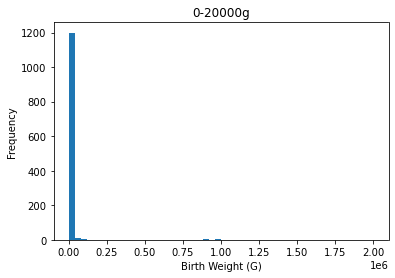

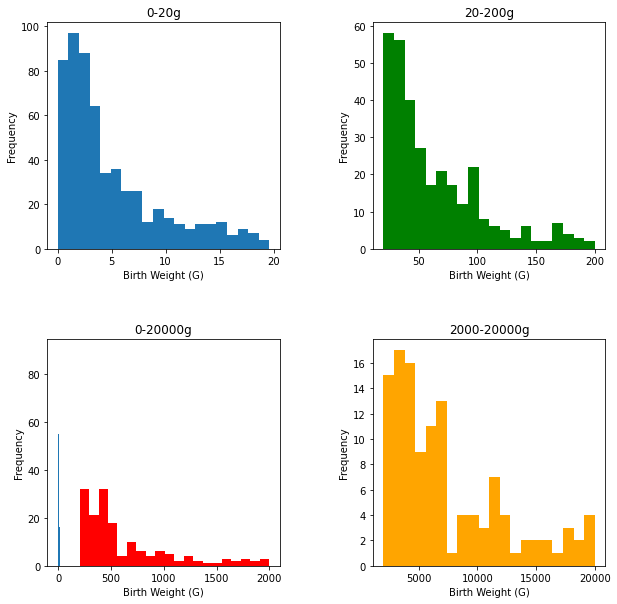

In [84]:

birth = df.dropna(subset=["Birth weight (g)"])

# - First, create a single histogram of birth weights, with 50 bins, labelled accordingly.  You should notice that it doesn't look very useful!

birth['Birth weight (g)'].plot(kind = 'hist', bins=50)
plt.title("0-20000g")
plt.xlabel('Birth Weight (G)') 

# - Next, create a figure with 4 density histograms, each with 20 bins, arranged into a 2-by-2 grid.  The first should histogram the birth weights of only animals 
# whose birth weights are below 20g. The second should show those whose weights are from 20g-200g; the third should show weights from 200g-2000g, 
# and the fourth should show weights from 2000g-20000g.  

# Initialize figure and axis
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


# first section 221
ax1 = fig.add_subplot(221)
plt.xlabel('Birth Weight (G)') 
birth['Birth weight (g)'].loc[birth['Birth weight (g)'] < 20].plot(kind='hist', bins = 20,)
plt.title("0-20g")
 
  

# fourth section 224
ax2 = fig.add_subplot(224)

plt.xlabel('Birth Weight (G)') 
birth['Birth weight (g)'].loc[(birth['Birth weight (g)'] <= 20000) & (birth['Birth weight (g)'] >= 2000)].plot(kind='hist', bins = 20, color = "orange" )
plt.title("2000-20000g")

# second section 222
ax3 = fig.add_subplot(222)

plt.xlabel('Birth Weight (G)') 
birth['Birth weight (g)'].loc[(birth['Birth weight (g)'] <= 200) & (birth['Birth weight (g)'] >= 20)].plot(kind='hist', bins = 20, color = "green" )
plt.title("20-200g")

# third section 223
ax4 = fig.add_subplot(223)

plt.xlabel('Birth Weight (G)') 
birth['Birth weight (g)'].loc[(birth['Birth weight (g)'] <= 2000) & (birth['Birth weight (g)'] >= 200)].plot(kind='hist', bins = 20, color = "red" )
plt.title("200-2000g")

# LAST PART LOCATED IN NEXT CELL BELOW PLEASE LOOK


Text(0.5, 0, 'Birth Weight (G)')

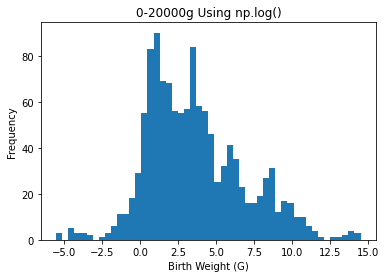

In [87]:
# - Finally, create a single histogram that shows the **logarithm** of birth weight across all of the available species in the data set.
birthlog = np.log(birth['Birth weight (g)']) 
birthlog.plot(kind = 'hist', bins=50)
plt.title("0-20000g Using np.log()")
plt.xlabel('Birth Weight (G)') 

What do you notice about the shapes of each of these histograms?  Are they skewed in a similar direction?

A. Every single one of the historgrams are always skewed to the right, as naturally there are less animals that have a greater birth weight. There are not many whales that weight 20000g at birth, but plenty of frogs, mice, and other small animals that weight 0-20gs.  

Then in Markdown speculate as to why might we want to use the last of these histograms instead of the original data values.

A. We would want to use the log transformed graph because the log transformation itself reduces/removes the skewness of the data, giving us a usable and representative graph of the "birth weight (g) data that we originally tried to graph but failed. 

**D**: Suppose we wanted to understand how humans and their closest relatives fit into this distribution.  To that end, we're going to explore species from the **primates**  order.  Our goal is to create a box plot of *each* of the **families** within the **primate** order.  But since a few of the families have very few individual species, instead create a box plot that contains a box for each primate **family** that has more than 11 "birth weights" present in the data  (more than 11 non-NaN rows).

Put a vertical line for the birth weight of the "sapiens" species somewhere on the plot as a basis of comparison. 

In other words, you are to:
- Figure out which families have primates actually have 12 or more species available
- Make a box plot of the birth weights of **those** families
- Figure out whether humans were already included in the plot you've made, and mark the human birth weight among primates somehow on the plot.

In [163]:
#Find how many families met the mentioned criteria, found to be 3, pretty managable can do manually
new = df.loc[(df['Order'] == 'Primates')].dropna(subset=['Birth weight (g)'])
new.groupby('Family').size()


Family
Aotidae             2
Atelidae            8
Callitrichidae     15
Cebidae             4
Cercopithecidae    39
Cheirogaleidae      5
Daubentoniidae      1
Galagidae           7
Hominidae           5
Hylobatidae         3
Indriidae           3
Lemuridae           9
Lepilemuridae       1
Lorisidae           5
Pitheciidae         3
Tarsiidae           3
dtype: int64

In [157]:
df.loc[df['Common name'] == 'Human', 'Birth weight (g)']

# new = df.loc[(df['Family'] == 'Cercopithecidae'), 'Birth weight (g)']
# new.dropna(subset=['Birth weight (g)'])

2407    3312.5
Name: Birth weight (g), dtype: float64

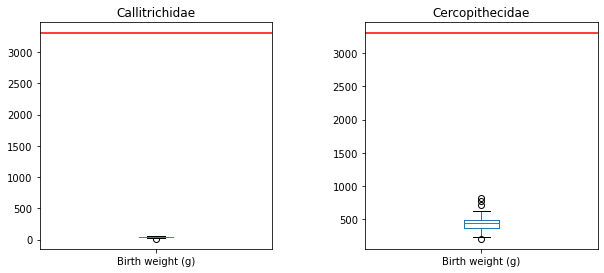

In [161]:
# Determined that given the data, only two families contained enough species birth weights (the rest either did not have enough or had empty rows that were excluded)
# I may have done this wrong because I don't see the point in comparing the birth weight of a human (3200g) to that of either of these species (sub 1000g)


# Initialize figure and axis
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


# first section 221
ax1 = fig.add_subplot(221)
 
df.loc[(df['Family'] == 'Callitrichidae'), 'Birth weight (g)'].plot(kind = 'box')
plt.title("Callitrichidae")
plt.axhline(y = 3312.5, color = 'r', linestyle = '-')

# second section 222
ax3 = fig.add_subplot(222)

df.loc[(df['Family'] == 'Cercopithecidae'), 'Birth weight (g)'].plot(kind = 'box')
plt.title("Cercopithecidae")
plt.axhline(y = 3312.5, color = 'r', linestyle = '-')

# df.loc[(df['Family'] == 'Atelidae'), 'Birth weight (g)'].plot(kind = 'box')
# plt.title("Atelidae")
# plt.axhline(y = 3312.5, color = 'r', linestyle = '-')

# third section 223

